In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.options.display.max_columns=500

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, PolynomialFeatures, StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA


In [2]:
df1 = pd.read_csv('E:/DataScience_Study/Aegis/Term-1/Project-Sessions/Bhavik Gandhi_ML/Proj-1_Regression/Fifa/data.csv', index_col=0) # wehave first unnamed col and we remove it
print(df1.shape)
df1.set_index('ID', inplace=True)
df1.head()

(18207, 88)


,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
# create a second dataframe which we will use for further computations and avoid reading data from drive again
fifa = df1.copy()

In [4]:
fifa.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
Special,18207.0,1597.809908,272.586016,731.0,1457.0,1635.0,1787.0,2346.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0
Crossing,18159.0,49.734181,18.364524,5.0,38.0,54.0,64.0,93.0
Finishing,18159.0,45.550911,19.525820,2.0,30.0,49.0,62.0,95.0


In [5]:
df1.isna().sum().sort_values(ascending=False)

Loaned From             16943
LDM                      2085
LM                       2085
CB                       2085
LCB                      2085
LB                       2085
RWB                      2085
RDM                      2085
CDM                      2085
LWB                      2085
RM                       2085
RCM                      2085
CM                       2085
LCM                      2085
RAM                      2085
RB                       2085
CAM                      2085
LAM                      2085
RW                       2085
RF                       2085
CF                       2085
LF                       2085
LW                       2085
RS                       2085
ST                       2085
LS                       2085
RCB                      2085
Release Clause           1564
Joined                   1553
Contract Valid Until      289
                        ...  
HeadingAccuracy            48
Finishing                  48
Crossing  

In [6]:
# check the datatype of each feature
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 158023 to 246269
Data columns (total 87 columns):
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 no

In [7]:
colnew = []

for col in fifa.columns:
    colnew.append(col.replace(' ', ''))
    
fifa.columns = colnew

In [8]:
# removing the columns that do not provide any additional information
fifa.drop(['Name','Photo','Flag','LoanedFrom','ClubLogo','JerseyNumber','ReleaseClause', 
           'Joined','ContractValidUntil','Height','Weight','Special','RealFace'], inplace=True, axis=1)

In [9]:
# split 'Work Rate' column into two columns which can be used in computation

df_workrate = fifa['WorkRate'].str.split('/ ', expand=True)
fifa['WorkrateAttack'], fifa['WorkrateDefense'] = df_workrate[0], df_workrate[1]
fifa.drop('WorkRate', axis=1, inplace=True)

In [10]:
# split the player position attributes at '+' and keep the existing attribute value for 'LS' to 'RB' columns
for col_name in fifa.loc[:,'LS':'RB'].columns:
    fifa[col_name] = fifa[col_name].str.split('+', expand=True)[0]

In [11]:
# combine the position attributes as per pitch area
fifa['Forward'] = fifa.loc[:,'LS':'RW'].astype('float64').mean(axis=1)
fifa['Midfield'] = fifa.loc[:,'LAM':'RM'].astype('float64').mean(axis=1)
fifa['Defense'] = fifa.loc[:,'LWB':'RB'].astype('float64').mean(axis=1)
fifa['GoalKeeper'] = fifa.loc[:,'GKDiving':'GKReflexes'].astype('float64').mean(axis=1)

# drop the columns that are replaced above
fifa.drop(fifa.loc[:,'LS':'RB'].columns.tolist(), axis=1, inplace=True)
fifa.drop(fifa.loc[:,'GKDiving':'GKReflexes'].columns.tolist(), axis=1, inplace=True)

In [12]:
# drop the rows that have 90% missing values
fifa.dropna(thresh=12, axis=0, inplace=True)

In [13]:
# imputing data in Position column based on Player attributes that can help us identify which position is suitable for the player 

from sklearn.tree import DecisionTreeClassifier

col = fifa.loc[:,'Crossing':'SlidingTackle'].columns
# filter data for model building
X = fifa[col][fifa['Position'].notna()]
y = fifa.Position[fifa['Position'].notna()]

# create test data with unknown fuelType fields
xt = fifa[col][fifa['Position'].isna()]
        
# build a decision tree model
dtree = DecisionTreeClassifier().fit(X,y)

# predict on test data
pos_pred = dtree.predict(xt)

# fill the missing values with the predicted values
fifa.Position[fifa['Position'].isna()] = pos_pred
# fifa.Position.isna().sum()

In [14]:
# players with no club details can be considered to be free agent.
fifa['Club'][fifa['Club'].isna()] = 'Free Agent'

In [15]:
# Correction in Value and Wage column.

ind = fifa.index
for i in ind:
    if ('M' in fifa.loc[i,'Value']) and ('.' in fifa.loc[i,'Value']):
        fifa.loc[i,'Value'] = fifa.loc[i,'Value'].replace('€','').replace('.','').replace('M','00000')
    else:
        fifa.loc[i,'Value'] = fifa.loc[i,'Value'].replace('€','').replace('K','000').replace('M','000000')
    fifa.loc[i,'Wage'] = fifa.loc[i,'Wage'].replace('€','').replace('K','000')
    
fifa.Value = fifa.Value.astype('int64')
fifa.Wage = fifa.Wage.astype('int64')

In [16]:
fifa.dropna(inplace=True)
# fifa.isna().sum()

In [17]:
fifa.loc[:,'Crossing':'SlidingTackle'] = fifa.loc[:,'Crossing':'SlidingTackle'].astype('int64')
fifa.loc[:,'Forward':'GoalKeeper'] = fifa.loc[:,'Forward':'GoalKeeper'].astype('int64')

In [18]:
fifa.BodyType[fifa.BodyType=='Messi'] = 'Lean'
fifa.BodyType[fifa.BodyType=='C. Ronaldo'] = 'Normal'
fifa.BodyType[fifa.BodyType=='Neymar'] = 'Lean'
fifa.BodyType[fifa.BodyType=='Courtois'] = 'Normal'
fifa.BodyType[fifa.BodyType=='PLAYER_BODY_TYPE_25'] = 'Normal'
fifa.BodyType[fifa.BodyType=='Shaqiri'] = 'Normal'
fifa.BodyType[fifa.BodyType=='Akinfenwa'] = 'Lean'

In [19]:
fifa.head()

,Age,Nationality,Overall,Potential,Club,Value,Wage,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,BodyType,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,WorkrateAttack,WorkrateDefense,Forward,Midfield,Defense,GoalKeeper
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,31,Argentina,94,94,FC Barcelona,110500000,565000,Left,5.0,4.0,4.0,Lean,RF,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,Medium,Medium,90,89,57,10
20801,33,Portugal,94,94,Juventus,77000000,405000,Right,5.0,4.0,5.0,Normal,ST,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,High,Low,90,85,59,11
190871,26,Brazil,92,93,Paris Saint-Germain,118500000,290000,Right,5.0,5.0,5.0,Lean,LW,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,High,Medium,87,85,57,11
192985,27,Belgium,91,92,Manchester City,102000000,355000,Right,4.0,5.0,4.0,Normal,RCM,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51,High,High,85,87,72,11
183277,27,Belgium,91,91,Chelsea,93000000,340000,Right,4.0,4.0,4.0,Normal,LF,81,84,61,89,80,95,83,79,83,94,94,88,95,90,94,82,56,83,66,80,54,41,87,89,86,91,34,27,22,High,Medium,86,86,58,9


In [20]:
fifa.shape

(16122, 48)

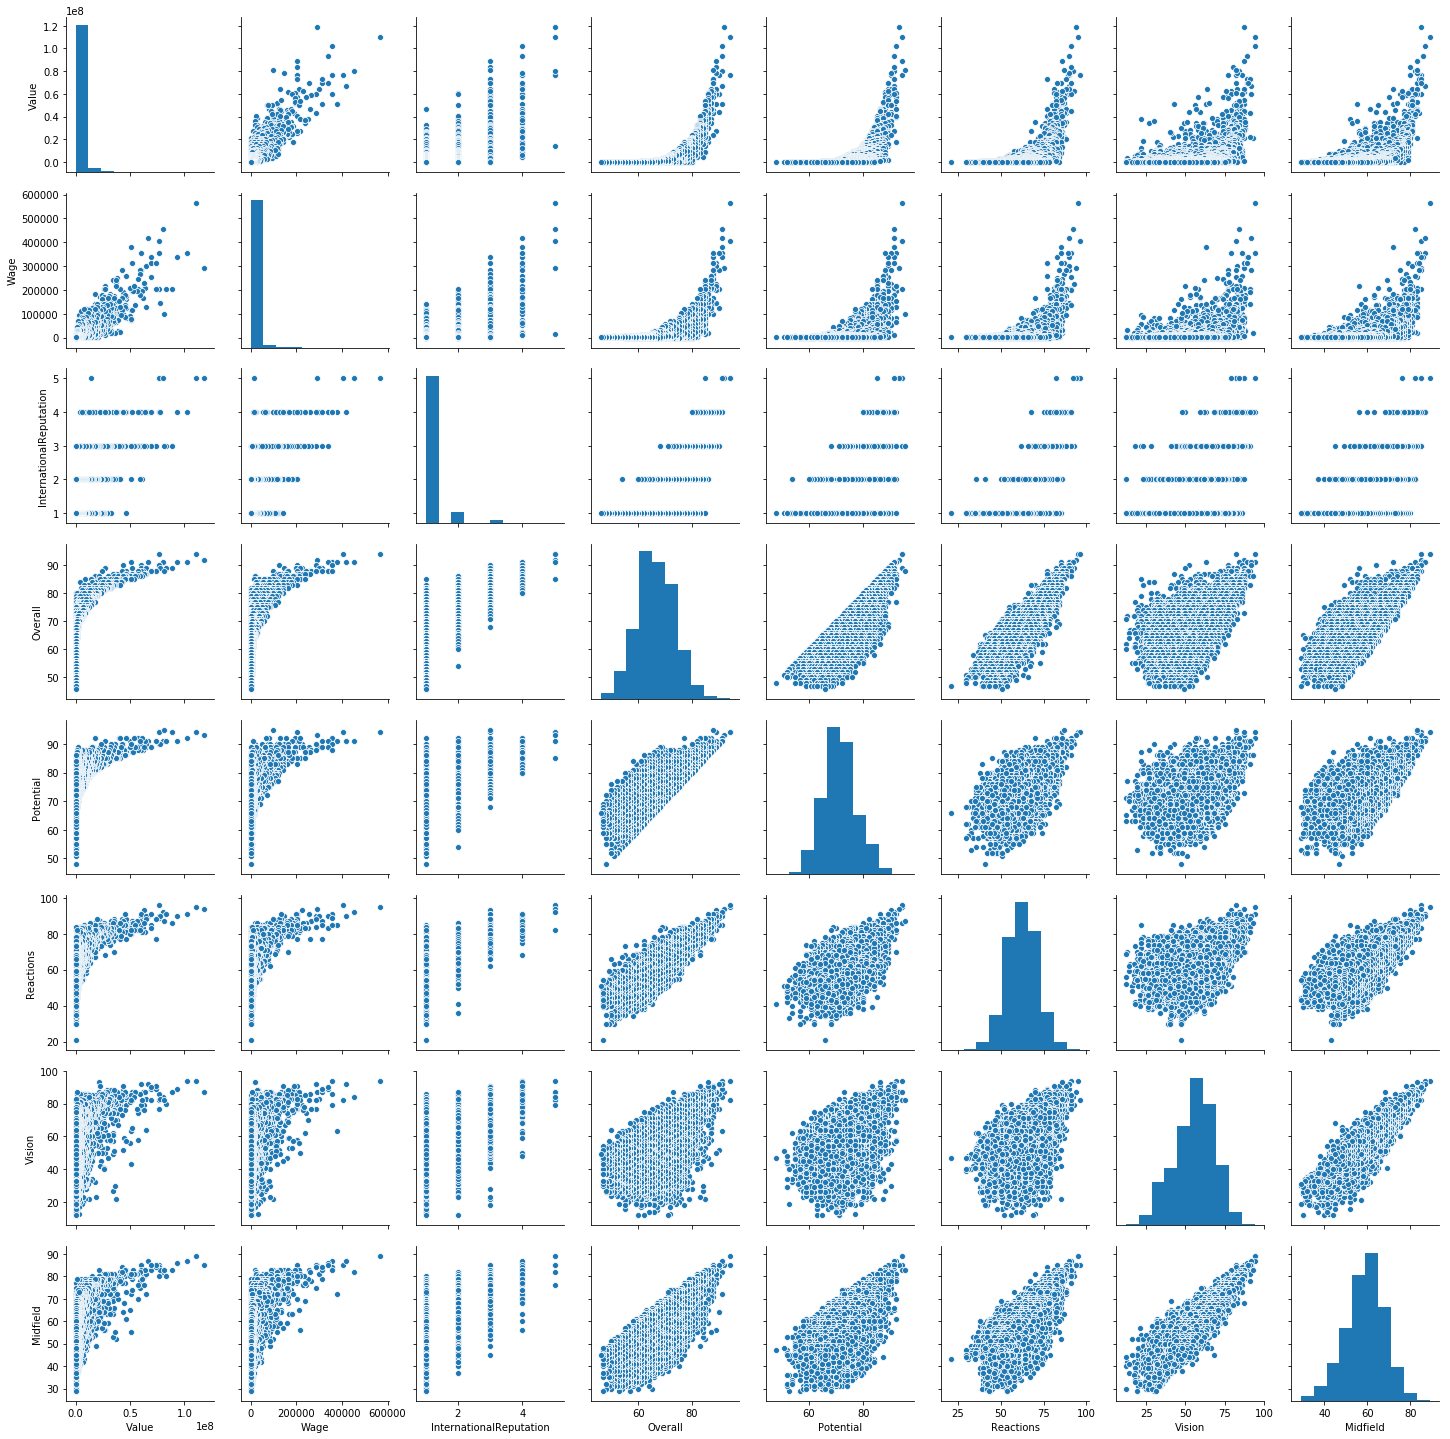

In [21]:
cols = ['Value', 'Wage', 'InternationalReputation', 'Overall', 'Potential', 'Reactions', 'Vision', 'Midfield']
sns.pairplot(fifa[cols], height=2.5)
plt.show()

    From this plot we can see how independent variabels varies with target variable. Based on this we can plan our further analysis. 
    For ex. Value and Wage are highly correlated with each other. Also Midfield and Vision features are highly collinear.

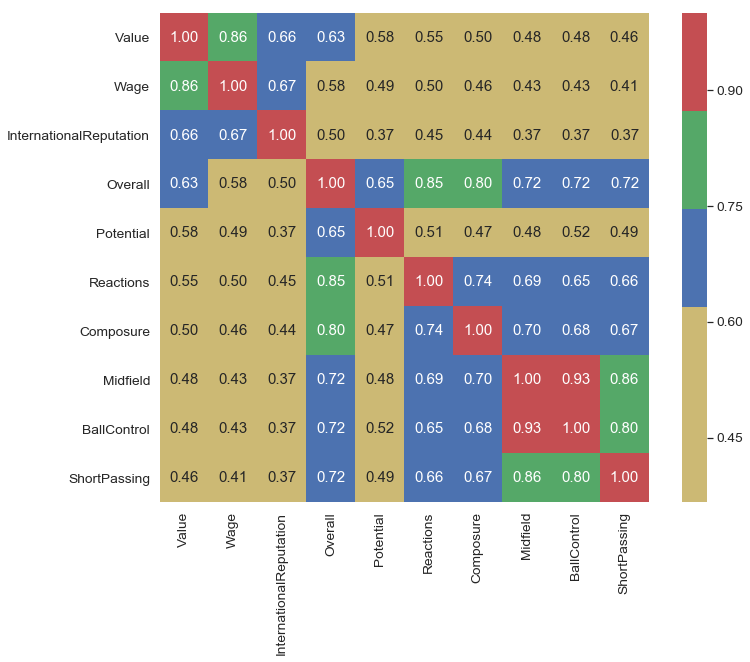

In [22]:
corr_mat = fifa.corr()
k=10
plt.figure(figsize=(12,9))
cols = corr_mat.nlargest(k, 'Value')['Value'].index
cm = np.corrcoef(fifa[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, annot=True, fmt='.2f', annot_kws={'size':15}, yticklabels=cols.values, xticklabels=cols.values, cmap=['y','y','b','g','r'], square=True)
plt.show()

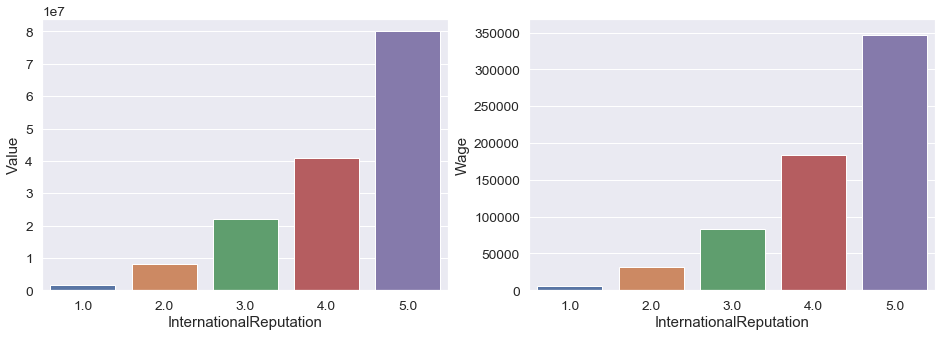

In [23]:
# Barplot
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.barplot(fifa.InternationalReputation, fifa.Value, ci=0)
plt.subplot(122)
sns.barplot(fifa.InternationalReputation, fifa.Wage, ci=0)
plt.show()

    The player with higher reputation tends to have higher Value and Wage.

<Figure size 1440x720 with 0 Axes>

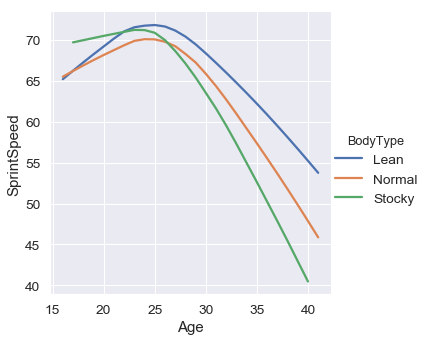

In [24]:
plt.figure(figsize=(20,10))
sns.lmplot(data = fifa, x = 'Age', y = 'SprintSpeed',lowess=True, hue='BodyType', scatter=False)
# plt.legend(loc='upper_right')
plt.show()
#As the age increases the sprint speed decreases

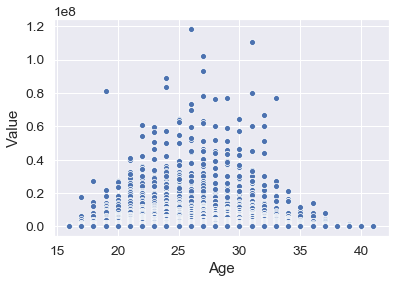

In [25]:
sns.scatterplot(data = fifa, x = 'Age', y = 'Value')
plt.show()
#As the age increases the sprint speed decreases

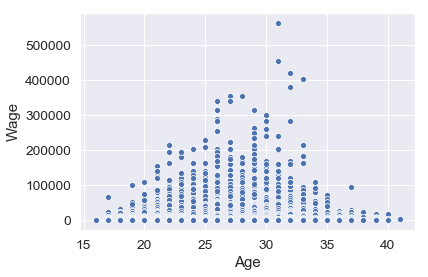

In [26]:
sns.scatterplot(data = fifa, x = 'Age', y = 'Wage')
plt.show()
#As the age increases the sprint speed decreases

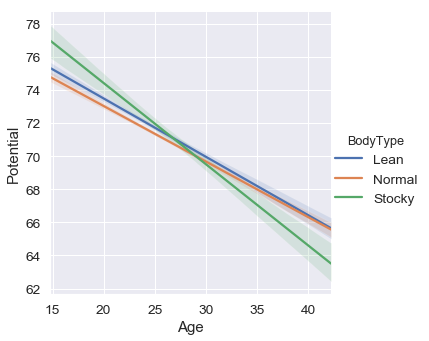

In [27]:
sns.lmplot(data = fifa, x = 'Age', y = 'Potential',hue='BodyType', scatter=False)
plt.show()
#As the age increases the sprint speed decreases

In [28]:
fifa1 = fifa[fifa['Value'] > 0]

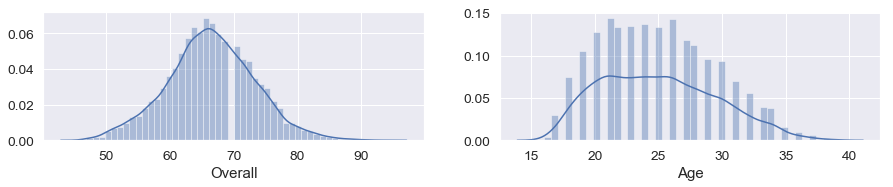

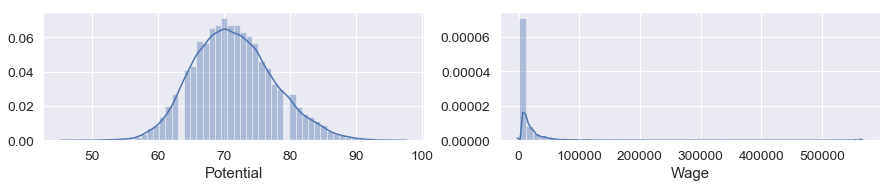

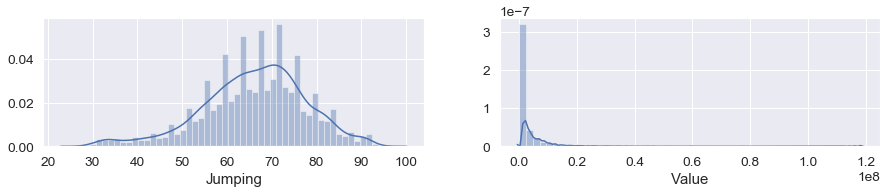

In [29]:
plt.subplots(figsize=(15,8))
plt.subplot(321)
sns.distplot(fifa1.Overall)
plt.subplot(322)
sns.distplot(fifa1.Age)
plt.show()

plt.subplots(figsize=(15,8))
plt.subplot(323)
sns.distplot(fifa1.Potential)
plt.subplot(324)
sns.distplot((fifa1.Wage))
plt.show()

plt.subplots(figsize=(15,8))
plt.subplot(325)
sns.distplot(fifa1.Jumping)
plt.subplot(326)
sns.distplot((fifa1.Value))
plt.show()

skewness Value: 6.949720133203008


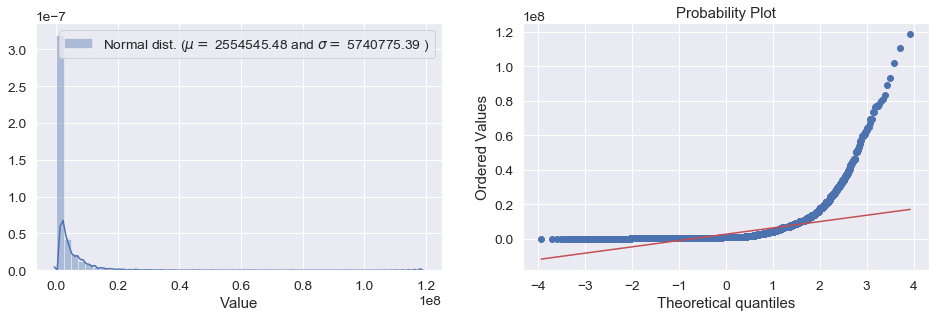

skewness Value with log: 0.41554385084381085


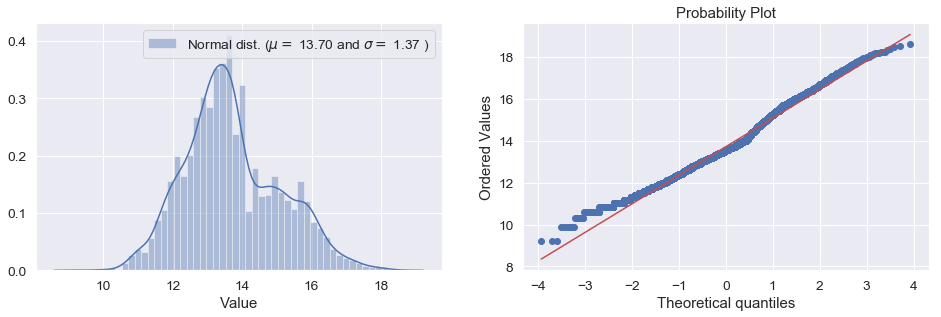

In [30]:
from scipy import stats
mu, sigma = stats.norm.fit(fifa1.Value)
# print(stats.norm.fit(fifa1.Value))
print('skewness Value:', fifa1.Value.skew())

plt.subplots(figsize=(16,10))
plt.subplot(221)
sns.distplot(fifa1.Value)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.subplot(222)
stats.probplot(fifa1.Value, plot=plt)
plt.show()

plt.subplots(figsize=(16,10))
v = np.log(fifa1.Value)
mu, sigma = stats.norm.fit(v)
# print(stats.norm.fit(v))
print('skewness Value with log:',v.skew())
plt.subplot(223)
sns.distplot(v)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.subplot(224)
stats.probplot(v, plot=plt)
plt.show()

In [31]:
fifa2 = fifa1.copy()

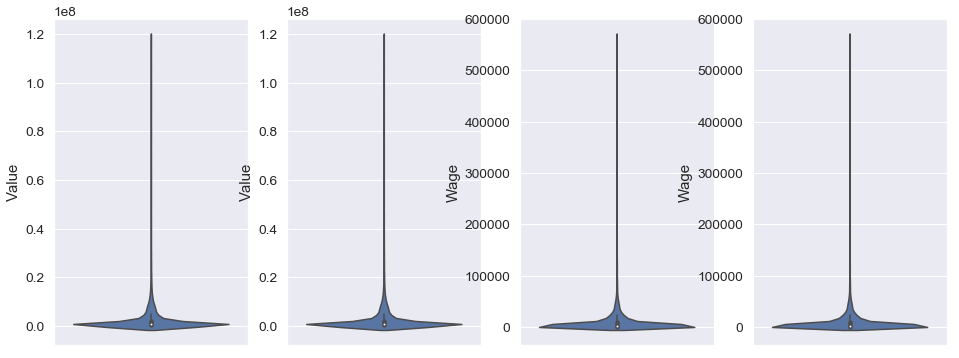

In [32]:
plt.subplots(figsize=(16,6))
plt.subplot(141)
sns.violinplot(fifa1.Value, orient='vertical')
plt.subplot(142)
sns.violinplot(fifa2.Value, orient='vertical')
# plt.subplots(figsize=(16,6))
plt.subplot(143)
sns.violinplot(fifa1.Wage, orient='vertical')
plt.subplot(144)
sns.violinplot(fifa2.Wage, orient='vertical')
plt.show()

In [33]:
# remove outliers
qtl_wage = np.quantile(fifa2.Wage, q=[0.25, 0.75])
qtl_val = np.quantile(fifa2.Value, q=[0.25,0.75])
IQR_wage = qtl_wage[1]-qtl_wage[0]
IQR_val = qtl_val[1] - qtl_val[0]
upper_wage = qtl_wage[1] + IQR_wage*1.5
upper_val = qtl_val[1] + 1.5*IQR_val
fifa2 = fifa2[(fifa2['Wage']<=upper_wage) & (fifa2['Value']<=upper_val)]

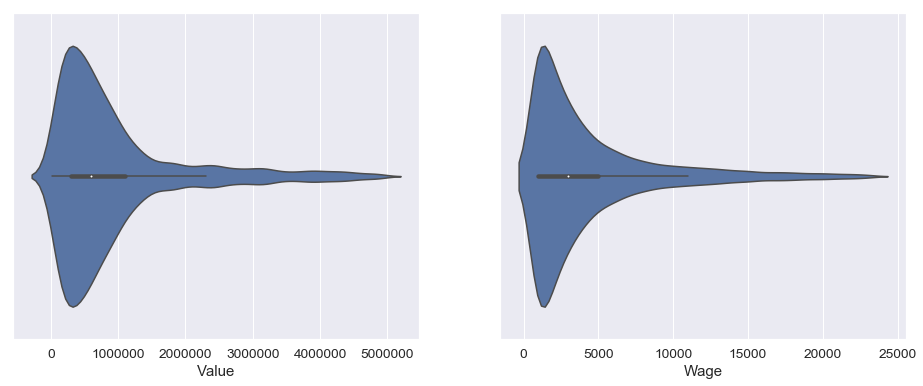

In [34]:
plt.subplots(figsize=(16,6))
plt.subplot(121)
sns.violinplot(fifa2.Value)
plt.subplot(122)
sns.violinplot(fifa2.Wage)
plt.show()

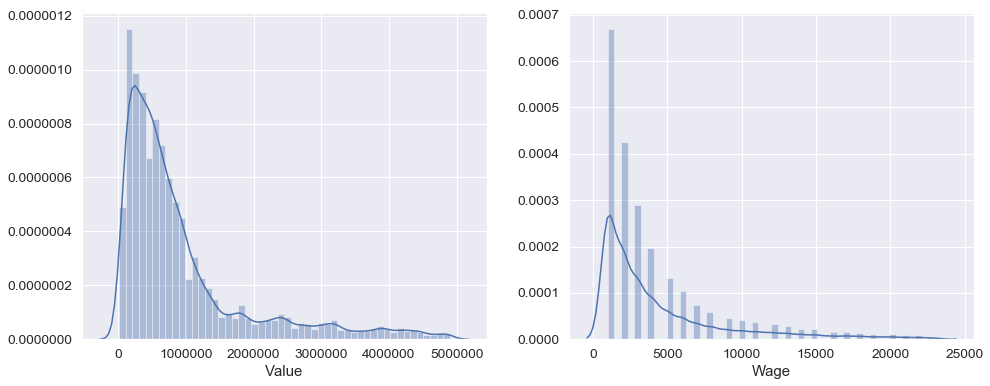

In [35]:
plt.subplots(figsize=(16,6))
plt.subplot(121)
sns.distplot(fifa2.Value)
plt.subplot(122)
sns.distplot(fifa2.Wage)
plt.show()

# Linear Regression

In [36]:
X = fifa2.drop(['Value','Nationality','PreferredFoot','WeakFoot','WorkrateAttack','WorkrateDefense',
               'BodyType','Wage','Forward','Midfield','BallControl','SkillMoves','Positioning',
               'Finishing'], axis=1)
y = np.log(fifa2.Value)

X = pd.get_dummies(X)

# X = mms.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=3)

lin_mod_1 = LinearRegression()
lin_mod_1.fit(X_train, y_train)

y_pred = lin_mod_1.predict(X_test)
x_pred = lin_mod_1.predict(X_train)

train_rmse = np.sqrt(mean_squared_error(y_true=np.exp(y_train), y_pred=np.exp(x_pred)))
test_rmse = np.sqrt(mean_squared_error(y_true=np.exp(y_test), y_pred=np.exp(y_pred)))
train_r2 = lin_mod_1.score(X_train, y_train)
test_r2 = lin_mod_1.score(X_test, y_test)
adjusted_r2 = 1 - ((1 - train_r2)*((X_train.shape[0] - 1)/(X_train.shape[0]-(X_train.shape[1]+1))))
print(f'Train r2_score: {train_r2:0.4f}; Train adj_r2_score: {adjusted_r2:0.4f}')
print(f'Test r2_score: {test_r2:0.4f}')
print('rmse on train:',train_rmse)
print('rmse on test_:',test_rmse)
print(f'rmse difference: {test_rmse-train_rmse}')

Train r2_score: 0.9627; Train adj_r2_score: 0.9600
Test r2_score: 0.9592
rmse on train: 296631.0240579507
rmse on test_: 307591.1609869729
rmse difference: 10960.136929022206


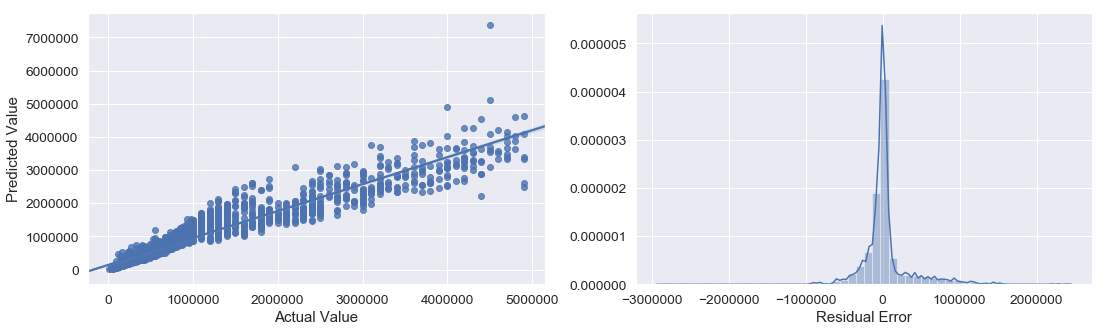

In [37]:
plt.subplots(figsize=(18,5))
plt.subplot(121)
sns.regplot(np.exp(y_test), np.exp(y_pred), scatter=True)
plt.ylabel('Predicted Value', fontsize=15)
plt.xlabel('Actual Value', fontsize=15)

plt.subplot(122)
sns.distplot(np.exp(y_test)-np.exp(y_pred))
plt.xlabel('Residual Error', fontsize=15)

plt.show()

In [38]:
result = pd.DataFrame({'Actual_Value': np.exp(y_test), 'Predicted_Value': np.exp(y_pred)})
result.Predicted_Value = result.Predicted_Value.astype('int64')
result.Actual_Value = result.Actual_Value.astype('int64')
result['Difference'] = result.Actual_Value - result.Predicted_Value
result.insert(loc=0,column='Name',value=np.nan)

In [39]:
for i in result.index:
    result.loc[i,'Name'] = df1.loc[i,'Name']

In [40]:
result

,Name,Actual_Value,Predicted_Value,Difference
ID,,,,
241867,Aitor Ruibal,700000,679773,20227
238519,H. Al Shamrani,375000,357571,17429
221493,Woo Ju Sung,550000,537091,12909
242933,J. Caraballo,324999,340304,-15305
184703,L. Montes,2399999,1707715,692284
229381,P. Rojas,949999,1193875,-243876
237542,G. Páez,924999,997070,-72071
226787,S. Rosales,1500000,1713961,-213961
215818,E. Hyndman,1199999,1321493,-121494


# Lasso 

In [41]:
X = fifa2.drop(['Value','Nationality'], axis=1)
y = np.log(fifa2.Value)

X = pd.get_dummies(X)

# X = mms.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=3)

lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
x_pred = lasso.predict(X_train)

train_rmse = np.sqrt(mean_squared_error(y_true=np.exp(y_train), y_pred=np.exp(x_pred)))
test_rmse = np.sqrt(mean_squared_error(y_true=np.exp(y_test), y_pred=np.exp(y_pred)))
train_r2 = lasso.score(X_train, y_train)
test_r2 = lasso.score(X_test, y_test)
adjusted_r2 = 1 - ((1 - train_r2)*((X_train.shape[0] - 1)/(X_train.shape[0]-(X_train.shape[1]+1))))
print(f'Train r2_score: {train_r2:0.4f}; Train adj_r2_score: {adjusted_r2:0.4f}')
print(f'Test r2_score: {test_r2:0.4f}')
print('rmse on train:',train_rmse)
print('rmse on test_:',test_rmse)
print(f'rmse difference: {test_rmse-train_rmse}')

Train r2_score: 0.8458; Train adj_r2_score: 0.8345
Test r2_score: 0.8558
rmse on train: 564977.9032948578
rmse on test_: 558842.8267704903
rmse difference: -6135.076524367556


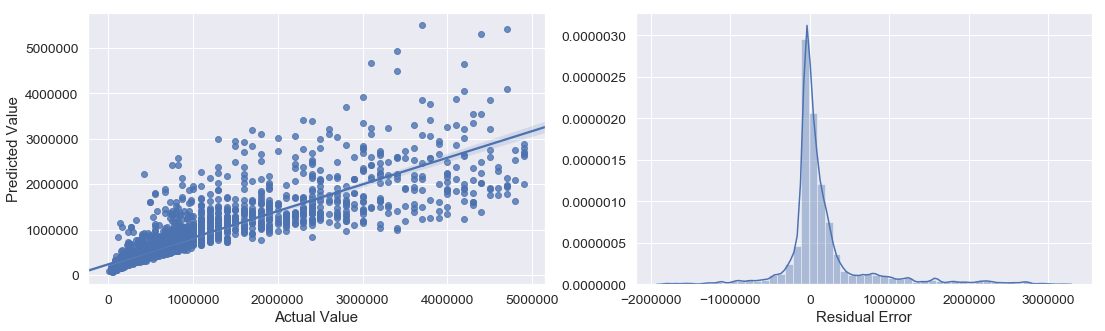

In [42]:
plt.subplots(figsize=(18,5))
plt.subplot(121)
sns.regplot(np.exp(y_test), np.exp(y_pred), scatter=True)
plt.ylabel('Predicted Value', fontsize=15)
plt.xlabel('Actual Value', fontsize=15)

plt.subplot(122)
sns.distplot(np.exp(y_test)-np.exp(y_pred))
plt.xlabel('Residual Error', fontsize=15)

plt.show()

In [43]:
result = pd.DataFrame({'Actual_Value': np.exp(y_test), 'Predicted_Value': np.exp(y_pred)})
result.Predicted_Value = result.Predicted_Value.astype('int64')
result.Actual_Value = result.Actual_Value.astype('int64')
result['Difference'] = result.Actual_Value - result.Predicted_Value
result.insert(loc=0,column='Name',value=np.nan)

In [44]:
for i in result.index:
    result.loc[i,'Name'] = df1.loc[i,'Name']

In [45]:
result

,Name,Actual_Value,Predicted_Value,Difference
ID,,,,
241867,Aitor Ruibal,700000,671036,28964
238519,H. Al Shamrani,375000,433888,-58888
221493,Woo Ju Sung,550000,493361,56639
242933,J. Caraballo,324999,319291,5708
184703,L. Montes,2399999,3386103,-986104
229381,P. Rojas,949999,654478,295521
237542,G. Páez,924999,662251,262748
226787,S. Rosales,1500000,1423152,76848
215818,E. Hyndman,1199999,1775752,-575753


# Ridge

In [46]:
X = fifa2.drop(['Value','Nationality','PreferredFoot','WeakFoot','WorkrateAttack','WorkrateDefense',
               'BodyType','Wage','Forward','Midfield','BallControl','SkillMoves','Positioning',
               'Finishing'], axis=1)
y = np.log(fifa2.Value)

X = pd.get_dummies(X)

# X = mms.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=3)

ridge = Ridge()
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
x_pred = ridge.predict(X_train)

train_rmse = np.sqrt(mean_squared_error(y_true=np.exp(y_train), y_pred=np.exp(x_pred)))
test_rmse = np.sqrt(mean_squared_error(y_true=np.exp(y_test), y_pred=np.exp(y_pred)))
train_r2 = ridge.score(X_train, y_train)
test_r2 = ridge.score(X_test, y_test)
adjusted_r2 = 1 - ((1 - train_r2)*((X_train.shape[0] - 1)/(X_train.shape[0]-(X_train.shape[1]+1))))
print(f'Train r2_score: {train_r2:0.4f}; Train adj_r2_score: {adjusted_r2:0.4f}')
print(f'Test r2_score: {test_r2:0.4f}')
print('rmse on train:',train_rmse)
print('rmse on test_:',test_rmse)
print(f'rmse difference: {test_rmse-train_rmse}')

Train r2_score: 0.9626; Train adj_r2_score: 0.9600
Test r2_score: 0.9596
rmse on train: 297517.1446788856
rmse on test_: 306962.63544507406
rmse difference: 9445.490766188479


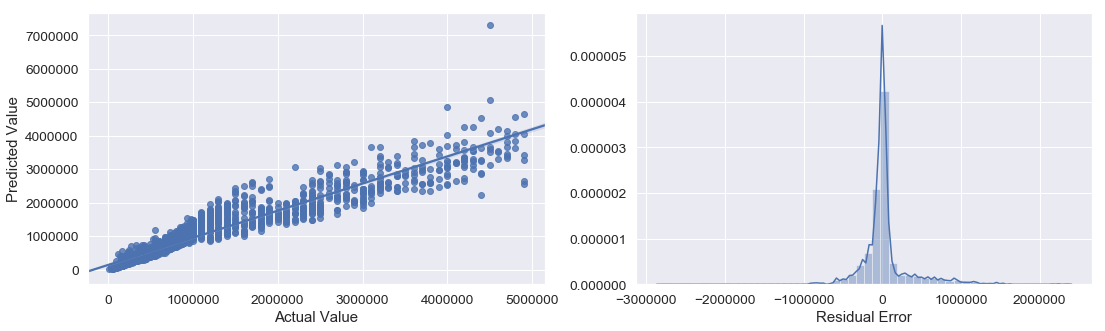

In [47]:
plt.subplots(figsize=(18,5))
plt.subplot(121)
sns.regplot(np.exp(y_test), np.exp(y_pred), scatter=True)
plt.ylabel('Predicted Value', fontsize=15)
plt.xlabel('Actual Value', fontsize=15)

plt.subplot(122)
sns.distplot(np.exp(y_test)-np.exp(y_pred))
plt.xlabel('Residual Error', fontsize=15)

plt.show()

In [48]:
result = pd.DataFrame({'Actual_Value': np.exp(y_test), 'Predicted_Value': np.exp(y_pred)})
result.Predicted_Value = result.Predicted_Value.astype('int64')
result.Actual_Value = result.Actual_Value.astype('int64')
result['Difference'] = result.Actual_Value - result.Predicted_Value
result.insert(loc=0,column='Name',value=np.nan)

In [49]:
for i in result.index:
    result.loc[i,'Name'] = df1.loc[i,'Name']

In [50]:
result

,Name,Actual_Value,Predicted_Value,Difference
ID,,,,
241867,Aitor Ruibal,700000,682727,17273
238519,H. Al Shamrani,375000,357630,17370
221493,Woo Ju Sung,550000,539182,10818
242933,J. Caraballo,324999,337872,-12873
184703,L. Montes,2399999,1701385,698614
229381,P. Rojas,949999,1195259,-245260
237542,G. Páez,924999,996532,-71533
226787,S. Rosales,1500000,1726820,-226820
215818,E. Hyndman,1199999,1319643,-119644
